# Criando uma história com os dados
- Vamos utilizar a base disponível em:
    - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv
    - Todos os arquivos estão disponíveis para download no link abaixo:
        - https://drive.google.com/drive/folders/1yzu_8qvCXOzHTVTyVRTk5gdd_ki93Em4?usp=sharing
- Temos uma base de **100 mil pedidos feitos entre 2016 e 2018** em vários marketplaces
- A base inclui desde informações do pedido (como preço e status) até a avaliação feita pelo cliente
- Todos os **dados são reais**, mas foram anonimizados

**Para trabalhar com pastas no Python, podemos utilizar a biblioteca os**
- https://docs.python.org/3/library/os.html

In [1]:
# Importando a biblioteca
import os

Para verificar a pasta atual, podemos utilizar o `.getcwd()`
- https://docs.python.org/3/library/os.html#os.getcwd

In [2]:
# Verificando a pasta que estamos atualmente
os.getcwd()

'C:\\Users\\cross\\Downloads'

In [26]:
# Guardando essa pasta em uma variável
pasta = os.getcwd()

Para verificar os arquivos, vamos usar o `.listdir()`
- https://docs.python.org/3/library/os.html#os.listdir

In [8]:
# Verificando os arquivos nessa pasta 
os.listdir(pasta+'/Bases')

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [9]:
# Guardando os arquivos em uma variável
arquivos = os.listdir(pasta+'/Bases')

In [10]:
# Visualizando os arquivos
arquivos

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

**A relação entre essas bases é mostrada abaixo no Data Schema abaixo:**
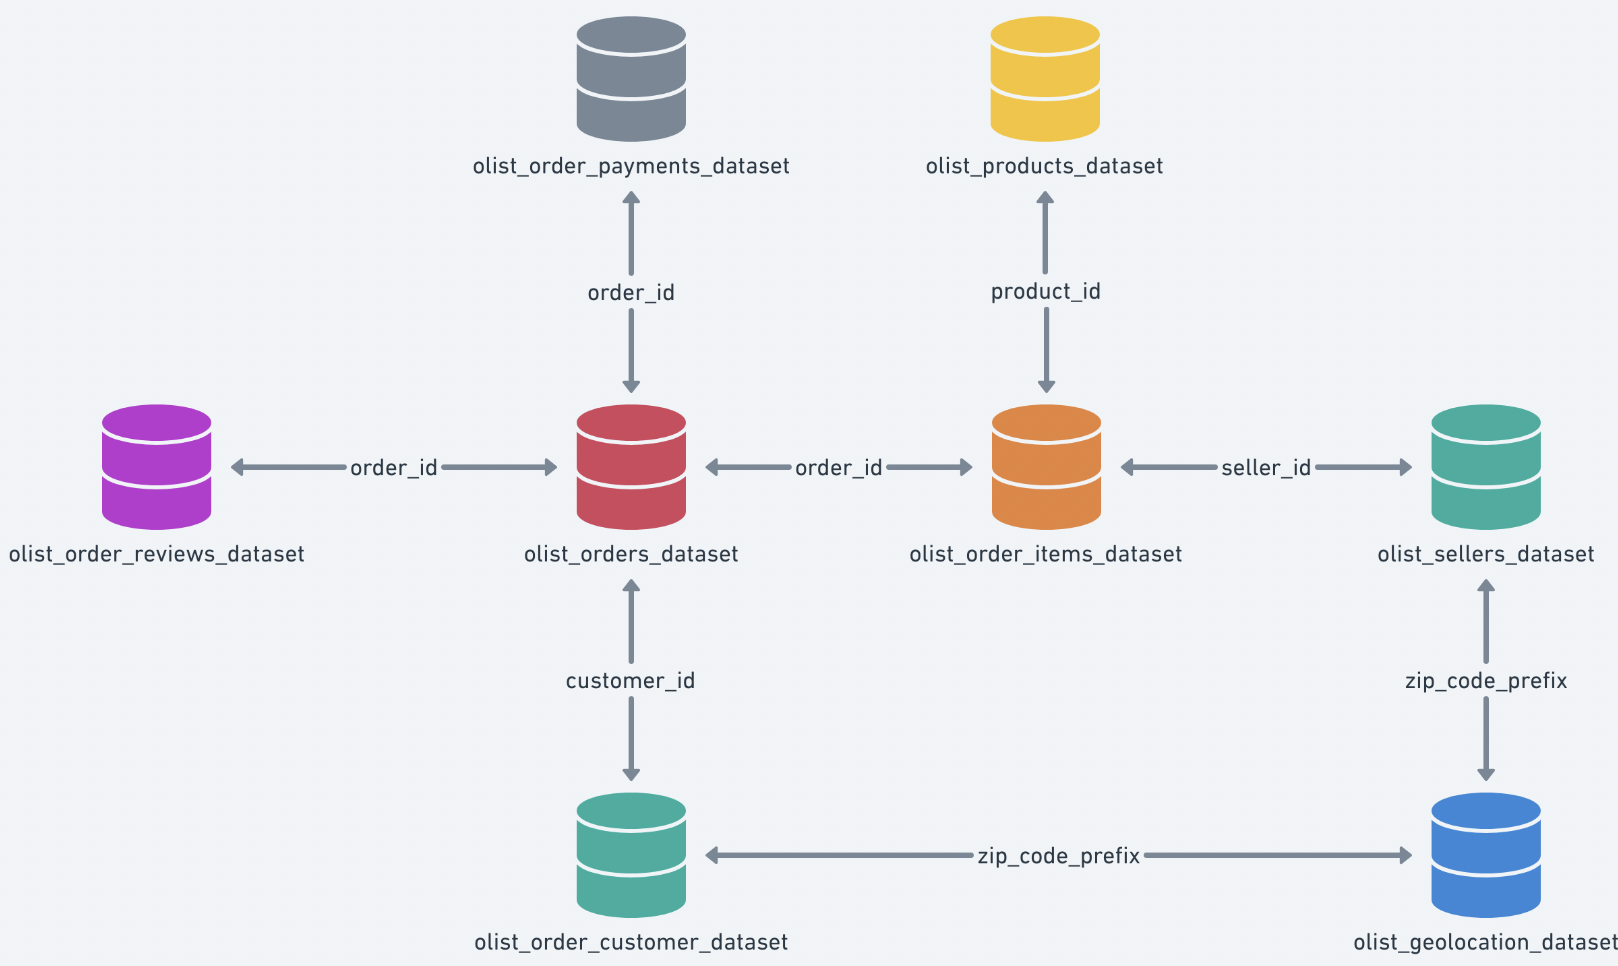

### Visualizando os dados no pandas
- Antes de trabalhar com esses dados no SQL, vamos visualizar no pandas cada uma das bases

In [11]:
# Importando o pandas
import pandas as pd

In [37]:
# Visualizando a olist_orders_dataset
base = pd.read_csv(pasta+'\\Bases\\olist_orders_dataset.csv')

In [25]:
# Visualizando as 5 primeiras linhas
base.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [27]:
# Visualizando as informações sobre a base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Precisamos visualizar todas as tabelas, como podemos fazer de forma mais prática?**

In [28]:
# Relembrando, quais são os arquivos nessa pasta?
arquivos

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [50]:
# Percorrendo toda a lista de arquivos
for i in arquivos:
    print(i)
    nome_base = i.replace('olist_','').replace('_dataset','').replace('.csv','')
    base = pd.read_csv(pasta+'\\Bases\\'+i)
    print(nome_base)
    display(base.head())
    globals()[nome_base] = base
    display(globals()[nome_base].head())

olist_customers_dataset.csv
customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


olist_geolocation_dataset.csv
geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


olist_orders_dataset.csv
orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


olist_order_items_dataset.csv
order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


olist_order_payments_dataset.csv
order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


olist_order_reviews_dataset.csv
order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


olist_products_dataset.csv
products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


olist_sellers_dataset.csv
sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


product_category_name_translation.csv
product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [49]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Aprofundando na base
- Segundo a própria base:
- <font color='red'>**Atenção:**
    - **Um pedido pode ter vários itens.**
    - **Cada item pode ser atendido por um vendedor distinto.**
    - **Todo o texto identificando lojas e parceiros foi substituído pelos nomes das grandes casas de Game of Thrones.**</font>

In [51]:
# Vamos começar olhando a tabela de ordens
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
# E então analisar a tabela de ordem x itens
order_items.head(50)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [61]:
# Vamos selecionar uma ordem para analisar
ordem = '001ab0a7578dd66cd4b0a71f5b6e1e41'

In [62]:
# E filtrar na tabela de ordens
orders[orders.order_id == ordem]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
26976,001ab0a7578dd66cd4b0a71f5b6e1e41,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,2017-12-28 02:33:42,2017-12-28 18:09:35,2018-01-17 20:43:29,2018-01-29 00:00:00


In [63]:
# Na tabela de ordem x itens
order_items[order_items.order_id == ordem]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
42,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63


In [64]:
# E na tabela de pagamentos
order_payments[order_payments.order_id == ordem]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
92672,001ab0a7578dd66cd4b0a71f5b6e1e41,1,boleto,1,127.56


**Alguma ordem teve mais de 1 item?**

In [66]:
# Fazendo o group by das ordens e verificando aquelas que tiveram mais de 1 item
order_items.groupby('order_id')['order_id'].count().sort_values()

order_id
00010242fe8c5a6d1ba2dd792cb16214     1
a6e9d106235bcf1dda54253686d89e99     1
a6e9b80a7636eb8dd592dbb3e20d0a91     1
a6e963c11e80432334e984ead4797a8b     1
a6e8ad5db31e71f5f12671af561acb4a     1
                                    ..
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
8272b63d03f5f79c56e9e4120aec44ef    21
Name: order_id, Length: 98666, dtype: int64

In [67]:
# Vamos selecionar uma ordem para analisar
ordem = '8272b63d03f5f79c56e9e4120aec44ef'

In [68]:
# E filtrar na tabela de ordens
orders[orders.order_id == ordem]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
88849,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00


In [69]:
# Na tabela de ordem x itens
order_items[order_items.order_id == ordem]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


**Se não conseguirmos encontrar por amostragem, podemos criar outras maneiras de nos aprofundarmos na base**
- Com o `.pivot()` podemos transformar o order_item_id em colunas e então buscar valores que o item para o id 1 seja diferente do id 2

In [71]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [78]:
# Criando um novo DataFrame apenas com o id da ordem, do item e da ordem_item
tabela = order_items[['order_id','order_item_id','product_id']]

In [82]:
tabela2 = tabela[(tabela.order_id == '001d8f0e34a38c37f7dba2a37d4eba8b') | (tabela.order_id == '001d8f0e34a38c37f7dba2a37d4eba8b')]
tabela2.head()

,order_id,order_item_id,product_id
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c


In [86]:
# Fazendo o pivot da tabela
tabela_pivot = tabela.pivot(index='order_id',columns='order_item_id').reset_index()
tabela_pivot.head()

order_id  \
order_item_id                                     
0              00010242fe8c5a6d1ba2dd792cb16214   
1              00018f77f2f0320c557190d7a144bdd3   
2              000229ec398224ef6ca0657da4fc703e   
3              00024acbcdf0a6daa1e931b038114c75   
4              00042b26cf59d7ce69dfabb4e55b4fd9   

                                     product_id                                \
order_item_id                                 1    2    3    4    5    6    7   
0              4244733e06e7ecb4970a6e2683c13e61  NaN  NaN  NaN  NaN  NaN  NaN   
1              e5f2d52b802189ee658865ca93d83a8f  NaN  NaN  NaN  NaN  NaN  NaN   
2              c777355d18b72b67abbeef9df44fd0fd  NaN  NaN  NaN  NaN  NaN  NaN   
3              7634da152a4610f1595efa32f14722fc  NaN  NaN  NaN  NaN  NaN  NaN   
4              ac6c3623068f30de03045865e4e10089  NaN  NaN  NaN  NaN  NaN  NaN   

                         ...                                                    
order_item_id    8    9  ...   12   13   14   15   16   17   18   19   20   21  
0              NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1              NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2              NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3              NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4              NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 22 columns]

In [94]:
# Renomeando as colunas para os nomes abaixo
colunas = ['order_id','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
tabela_pivot.columns = colunas
tabela_pivot.head()

,order_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
13,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,368c6c730842d78016ad823897a372db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66ac6058e2e4aff656071a,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,0b0172eb0fd18479d29c3bc122c058c2,0b0172eb0fd18479d29c3bc122c058c2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,001d8f0e34a38c37f7dba2a37d4eba8b,e67307ff0f15ade43fcb6e670be7a74c,e67307ff0f15ade43fcb6e670be7a74c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,002c9def9c9b951b1bec6d50753c9891,2d9ff06c8870a518f5f6909774e140fb,2d9ff06c8870a518f5f6909774e140fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Retirando as linhas onde o id 2 é vazio
tabela_pivot = tabela_pivot[tabela_pivot['2'].notnull()]

In [96]:
# Buscando valores onde o id 1 seja diferente do id 2
tabela_pivot[tabela_pivot['1'] != tabela_pivot['2']]

,order_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
73,002f98c0f7efd42638ed6100ca699b42,d41dc2f2979f52d75d78714b378d4068,880be32f4db1d9f6e2bec38fb6ac23ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,00337fe25a3780b3424d9ad7c5a4b35e,1f9799a175f50c9fa725984775cac5c5,13944d17b257432717fd260e69853140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,005d9a5423d47281ac463a968b3936fb,fb7a100ec8c7b34f60cec22b1a9a10e0,4c3ae5db49258df0784827bdacf3b396,4c3ae5db49258df0784827bdacf3b396,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,00946f674d880be1f188abc10ad7cf46,4dcb49b9ca7e48d2f108d40caa77caa2,9bb2d066e4b33b624cbdfec7d50b3dcb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,0097f0545a302aafa32782f1734ff71c,b6397895a17ce86decd60b898b459796,636598095d69a5718e67d2c9a3c7dde6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98540,ffa5e4c604dea4f0a59d19cc2322ac19,59d8034bb2a82cd5092e78d42148fa44,bd421826916d3e1d445cb860cea3c0fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98555,ffb18bf111fa70edf316eb0390427986,599dc392f7a23273471b068d72408224,e86b81dcac341ea01df0260077cdf082,599dc392f7a23273471b068d72408224,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98563,ffb8f7de8940249a3221252818937ecb,bd6e8cf9fe4122c385da2bcb9f979d5d,803f77475e1b51b47f1bfec4f2ec353f,bd0ac51dc93e62c4dbe6ca9d70a9b311,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98575,ffc16cecff8dc037f60458f28d1c1ba5,241e398aacc909372622952b2ec6f954,7c1043bb5837db0c6bc1953419a18628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Verificando itens com mais de 1 forma de pagamento**

In [99]:
# Filtrando na base de pagamentos se existem itens repetidos
order_payments.groupby('order_id')['order_id'].count().sort_values()

order_id
00010242fe8c5a6d1ba2dd792cb16214     1
a9fa8567c21a5f8e4450af02a87f26cb     1
a9fa7ea99c0724de00e9d31f2a39a723     1
a9fa4232de4a87398cfab2a5bcbecc56     1
a9f99ebcef2a23dd06a0bd5ed649080e     1
                                    ..
fedcd9f7ccdc8cba3a18defedd1a5547    19
895ab968e7bb0d5659d16cd74cd1650c    21
285c2e15bebd4ac83635ccc563dc71f4    22
ccf804e764ed5650cd8759557269dc13    26
fa65dad1b0e818e3ccc5cb0e39231352    29
Name: order_id, Length: 99440, dtype: int64

In [101]:
# Analisando os itens com mais de 1 linha
order_payments[order_payments.order_id == 'fedcd9f7ccdc8cba3a18defedd1a5547']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7548,fedcd9f7ccdc8cba3a18defedd1a5547,15,voucher,1,10.66
9665,fedcd9f7ccdc8cba3a18defedd1a5547,1,credit_card,1,1.67
14352,fedcd9f7ccdc8cba3a18defedd1a5547,9,voucher,1,5.30
15264,fedcd9f7ccdc8cba3a18defedd1a5547,11,voucher,1,8.42
15930,fedcd9f7ccdc8cba3a18defedd1a5547,8,voucher,1,31.43
18175,fedcd9f7ccdc8cba3a18defedd1a5547,14,voucher,1,7.63
27087,fedcd9f7ccdc8cba3a18defedd1a5547,2,voucher,1,7.76
32396,fedcd9f7ccdc8cba3a18defedd1a5547,13,voucher,1,5.84
35657,fedcd9f7ccdc8cba3a18defedd1a5547,19,voucher,1,8.42
36869,fedcd9f7ccdc8cba3a18defedd1a5547,5,voucher,1,9.76


**Verificando itens vendidos por mais de 1 vendedor**

In [102]:
# Selecionando uma base com apenas o product_id e o seller_id
tabela = order_items[['product_id','seller_id']]

In [103]:
# Eliminando valores duplicados
tabela = tabela.drop_duplicates()
tabela.head()

,product_id,seller_id
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


In [104]:
# Contando a quantidade de product_id para verificar se existe mais de 1 vendedor
tabela.groupby('product_id')['seller_id'].count().sort_values()

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
aa0d48704d551d1247be98ca06dfa990    1
aa0c047aa75f7c8e437acd62601055fe    1
aa0816cf69c9faa95e573541be5c0c32    1
aa07dadb101ca2d652eaaec5c33c37af    1
                                   ..
656e0eca68dcecf6a31b8ececfabe3e8    7
36f60d45225e60c7da4558b070ce4b60    7
4298b7e67dc399c200662b569563a2b2    7
69455f41626a745aea9ee9164cb9eafd    8
d285360f29ac7fd97640bf0baef03de0    8
Name: seller_id, Length: 32951, dtype: int64

In [105]:
# Filtrando na base qualquer um desses produtos
tabela[tabela.product_id =='656e0eca68dcecf6a31b8ececfabe3e8' ]

,product_id,seller_id
111,656e0eca68dcecf6a31b8ececfabe3e8,0b90b6df587eb83608a64ea8b390cf07
1462,656e0eca68dcecf6a31b8ececfabe3e8,5f67c6082caacb26e431a7b17940cece
1510,656e0eca68dcecf6a31b8ececfabe3e8,e9bc59e7b60fc3063eb2290deda4cced
10924,656e0eca68dcecf6a31b8ececfabe3e8,9c0e69c7bf2619675bbadf47b43f655a
16932,656e0eca68dcecf6a31b8ececfabe3e8,8e6d7754bc7e0f22c96d255ebda59eba
21716,656e0eca68dcecf6a31b8ececfabe3e8,00fc707aaaad2d31347cf883cd2dfe10
41805,656e0eca68dcecf6a31b8ececfabe3e8,6973a06f484aacf400ece213dbf3d946


**Verificando a tabela de reviews**

In [106]:
# Visualizando a base
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [111]:
# Verificando as notas
order_reviews.review_score.value_counts().sort_values()

review_score
2     3151
3     8179
1    11424
4    19142
5    57328
Name: count, dtype: int64

In [112]:
# Analisando quantas pessoas avaliam suas compras
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
